## Регрессия от нескольких параметров 
Y (зависимая переменная), X1 X2 X3...

O = sum(Xi)/n - sum(Yi)/n

для множества параметров: сделать матрицу Х, транспонировать её, и умножить на Х

**X(T)*X** = M квадратная матрица размера количества параметров (transpose)

**M^(-1)** - найти обратную матрицу np.inverse (вычеркивать повтояющиеся параметра, например, общую площадь, если уже даны площади комнат отдельно)

**X(T) * Y = P**

**P * M^(-1)** - вектор с параметрами, по этим параметрам найти стоимость какой-то квартиры Y = a1X1 + a2X2

осень - 3хкомн, лето - 2хкомн квартиры

на сколько увелич-ся цена при увел-ии квадрат метра? - эластичность 

In [3]:
import pandas as pd

# Assign spreadsheet filename to `file`
file = 'Flats.xls'

# Load spreadsheet
xl = pd.ExcelFile(file)

# Load a sheet into a DataFrame by name: df1
data = xl.parse('Лист1')

Подготовка данных. Нам понадобятся следующие столбцы:

2 - цена, тыс. долларов; 

5 - жилая площадь, кв.м; 

6 - площадь подсобных помещений, кв.м; 

7 - площадь кухни и туалета, кв.м; 

8 - расстояние до центра, км; 

9 - время, затрачиваемое на дорогу до ближайшей станции метро, мин.;

Строится зависимость параметра 2 от параметров 5-9, поэтому параметр 2 выносим в вектор Y, а остальные - складываем в новый датафрейм. Также учитываем только 3-х комнатные квартиры.

In [4]:
def dataPreparation(data):
    '''
    Подготовка данных. Оставляются только необходимые для предсказания параметры, и добавляется единичный столбец 
    для нахождения коэффициентов линейной регресии.
    Входной аргумент - DataFrame. Возвращаются новый DataFrame с необходимыми параметрами и вектор, 
    для которого строится зависимость'''
    
    data_regr = data[data['ROOM'] == 3]
    Y = data_regr["PRICE"]
    data_regr = data_regr.drop(["WALK", "BRICK", "TEL", "BAL", "FLOOR", "ROOM", "PRICE"], axis = 1, inplace = False)
    data_regr.insert(0, 'FREE', 1)
    return data_regr, Y


data_regr, Y = dataPreparation(data)
data_regr.head()


,FREE,LIVSQ,APPEN,KITSQ,DIST,METRDIST
288,1,54.0,16.5,9.5,7.895,7.0
289,1,52.0,22.6,8.4,6.600,4.0
290,1,39.5,13.3,8.0,16.500,10.0
291,1,53.0,10.7,8.3,1.840,10.0
292,1,63.0,18.0,7.0,1.650,10.0


Найдём вектор с коэффициентами для множественной регрессии вида: 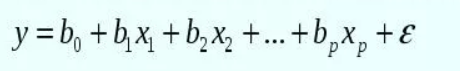 

Следующим образом: 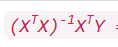
**X(T)*X** = M квадратная матрица размера количества параметров (transpose)

**M^(-1)** - найти обратную матрицу np.inverse (вычеркивать повтояющиеся параметра, например, общую площадь, если уже даны площади комнат отдельно)

**X(T) * Y = P**

**P * M^(-1)** - вектор с параметрами, по этим параметрам найти стоимость какой-то квартиры Y = a1X1 + a2X2

осень - 3хкомн


In [5]:
import numpy as np

def findKoef(data_regr):
    '''
    Вычисление коэффициентов уравнения множественно регрессии.
    Входной аргмент - dataframe с параметрами, необходимыми для предсказания - преобразовывается в Numpy array.
    Возвращается вектор с коэффициентами и numpy array'''

    X = data_regr.to_numpy()
    X_T = X.transpose()  # транспонировали матрицу X
    M = np.dot(X_T, X)  # умножили X-трансп на Х
    M = np.linalg.inv(M) # нашли обратную
    P = np.dot(X_T, Y) # умножили Х-трансп на вектор Y
    P = np.dot(M, P) # (X-трансп на Х)*(Х-трансп на вектор Y)
    return P, X

P, X = findKoef(data_regr)
print("Vector = ", P) # вектор параметров - первый это свободный член

Vector =  [-6.01612593e+01  1.95335503e+00  1.49056700e+00  4.92103501e+00
 -1.48265326e+00  3.45591740e-03]


### Предсказание цены с помощью полученных коэффициентов

In [6]:
def printPrice(X, P, Y):
    '''
    Вывод предсказанного на основе параметров значения и вывод настоящего в форме X - Y.
    Входные аргументы - numpy array с параметрами, необходимыми для предсказания, вектор коэффициентов, вектор с ценой'''
 
    sum_of_parametres = 0
    for j in range(len(X)):
        for i in range(0, 6):
            sum_of_parametres += X[j][i]*P[i]
        print(round(sum_of_parametres, 2) , "-", Y[j+288])
        sum_of_parametres = 0
        
printPrice(X,P,Y)

104.98 - 75.0
106.67 - 110.0
51.76 - 63.0
97.47 - 101.0
121.77 - 142.0
100.48 - 100.0
92.82 - 103.0
29.03 - 40.5
33.94 - 47.0
54.71 - 40.5
89.33 - 65.0
77.41 - 76.0
96.2 - 93.0
49.01 - 47.0
56.62 - 53.0
99.65 - 86.0
97.23 - 115.0
78.99 - 82.0
59.9 - 53.0
42.36 - 40.0
48.75 - 57.0
84.74 - 58.0
49.88 - 48.0
102.75 - 71.0
83.53 - 55.0
67.34 - 56.5
95.7 - 133.0
105.12 - 185.0
91.92 - 94.0
75.55 - 61.5
55.27 - 56.0
125.61 - 112.0
157.1 - 255.0
88.75 - 88.0
122.09 - 75.0
51.53 - 41.0
50.4 - 51.0
84.79 - 60.0
67.47 - 74.5
52.86 - 49.0
87.62 - 58.0
70.68 - 67.0
65.78 - 62.0
63.23 - 67.0
97.73 - 53.0
92.5 - 53.8
44.02 - 52.0
52.68 - 69.0
93.98 - 112.5
103.37 - 81.0
51.13 - 53.0
113.08 - 95.0
98.24 - 86.0
109.28 - 80.0
44.12 - 58.0
85.69 - 65.0
55.59 - 49.5
80.04 - 66.0
43.83 - 52.0
89.01 - 95.0
95.18 - 85.0
76.42 - 89.0
61.98 - 59.5
86.52 - 95.5
124.77 - 80.0
81.17 - 80.0
104.98 - 145.0
80.2 - 74.0
95.88 - 83.0
87.24 - 120.0
98.8 - 89.0
118.53 - 135.0
148.14 - 125.0
65.25 - 48.0
55.72 - 69.0
60

### Задача в терминах эластичности. 
Чтобы узнать, как изменится цена при увеличении площади на 1%, нужно взять логарифм от изначальных данных и вывести новые коэффициенты для уравнения линейной регрессии. 

In [7]:
def findKoefElast(data_regr):
    '''
    Нахождение вектора коэффициентов линейной регрессии в терминах эластичности. Берётся логарифм от dataframe с необходимыми
    для предсказания параметрами и от вектора с зависимым параметром. Повторяет действия функции findKoef()'''
    
    data_elast = np.log(data_regr)
    Y_elast = np.log(Y)
    # пришлось дропнуть единичный столбец, иначе коэф корреляции один, не найдёт обратную
    data_elast = data_elast.drop(["FREE"], axis = 1, inplace = False)
    X_elast = data_elast.to_numpy()
    X_T_elast = X_elast.transpose()  # транспонировали матрицу X
    M_elast = np.dot(X_T_elast, X_elast)  # умножили X-трансп на Х
    M_elast = np.linalg.inv(M_elast) # нашли обратную
    P_elast = np.dot(X_T_elast, Y_elast) # умножили транспон Х на вектор Y
    P_elast = np.dot(M_elast, P_elast)
    return P_elast, X_elast

P_elast, X_elast = findKoefElast(data_regr)
print("Vector elast = ", P_elast) # вектор параметров - первый это свободный член


Vector elast =  [ 0.77539917  0.27598735  0.43774687 -0.15316117  0.00809658]


### Предсказание цены в терминах эластичности. 

In [9]:
def printPriceElast(X_elast, P_elast, Y):
    '''
    Вывод предсказанного на основе параметров значения c взятием обратного логарифма в терминах эластичности и 
    вывод настоящего в форме X - Y.
    Входные аргументы - numpy array с параметрами, необходимыми для предсказания, вектор коэффициентов, вектор с ценой'''
 
    sum_of_parametres = 0
    for j in range(len(X_elast)):
        for i in range(0, 5):
            sum_of_parametres += X_elast[j][i]*P_elast[i]
        print(round(np.exp(sum_of_parametres),2), Y[j+288])
        sum_of_parametres = 0

printPriceElast(X_elast, P_elast, Y)

94.78 75.0
97.33 110.0
58.23 63.0
97.94 101.0
122.0 142.0
103.96 100.0
85.67 103.0
43.42 40.5
44.96 47.0
56.14 40.5
83.61 65.0
77.45 76.0
93.22 93.0
54.75 47.0
58.73 53.0
89.81 86.0
90.5 115.0
75.41 82.0
59.78 53.0
49.88 40.0
51.68 57.0
79.34 58.0
51.28 48.0
92.89 71.0
79.6 55.0
67.71 56.5
94.1 133.0
100.17 185.0
85.63 94.0
71.3 61.5
60.55 56.0
109.98 112.0
137.63 255.0
82.79 88.0
139.95 75.0
47.57 41.0
53.3 51.0
77.21 60.0
65.96 74.5
55.31 49.0
82.61 58.0
69.04 67.0
67.47 62.0
62.84 67.0
88.53 53.0
86.33 53.8
49.31 52.0
53.18 69.0
87.19 112.5
90.61 81.0
54.88 53.0
110.42 95.0
97.2 86.0
112.69 80.0
48.43 58.0
79.54 65.0
54.39 49.5
77.58 66.0
50.95 52.0
83.62 95.0
87.64 85.0
74.59 89.0
57.67 59.5
81.9 95.5
114.28 80.0
74.99 80.0
114.67 145.0
77.18 74.0
88.58 83.0
82.21 120.0
89.1 89.0
106.46 135.0
137.03 125.0
65.69 48.0
59.01 69.0
64.18 69.0
77.24 90.0
126.65 165.0
93.47 207.0
85.84 95.5
91.68 111.5
83.53 122.0
94.7 105.0
61.44 87.0
57.06 87.0
187.25 240.0
110.16 145.0
48.87 38.0
83.19

In [8]:
def findElastKoef(P, data_regr):
    '''
    Расчёт коэффициентов эластичности по вектору с коэффициентами линейной регрессии и dataframe с необходимыми
    для предсказания переменными'''
    
    elast_koef = [0,0,0,0,0]
    elast_koef[0] = P[1] * data_regr["LIVSQ"].mean()/Y.mean()
    elast_koef[1] = P[2] * data_regr["APPEN"].mean()/Y.mean()
    elast_koef[2] = P[3] * data_regr["KITSQ"].mean()/Y.mean()
    elast_koef[3] = P[4] * data_regr["DIST"].mean()/Y.mean()
    elast_koef[4] = P[5] * data_regr["METRDIST"].mean()/Y.mean()
    return elast_koef

elast_koef = findElastKoef(P, data_regr)
print(elast_koef)

[1.0937005997077258, 0.2960969221820023, 0.49862049916229756, -0.17897215056501867, 0.0003307675114266284]


### Визуалицация зависимости цены от жилой площади

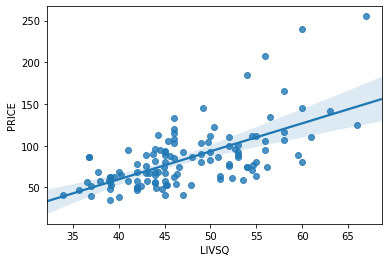

In [63]:
import seaborn as sns

data_plot_livsq = data[data['ROOM'] == 3]
data_plot_livsq = data_plot_livsq[["PRICE", "LIVSQ"]]
sns.regplot(x="LIVSQ", y="PRICE", data=data_plot_livsq)

### Визуалицация зависимости цены от площади кухни

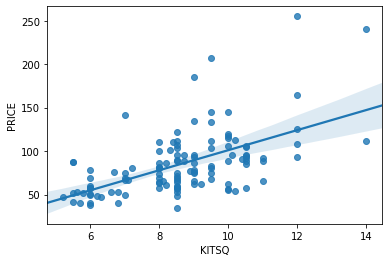

In [65]:
data_plot_kitsq = data[data['ROOM'] == 3]
data_plot_kitsq = data_plot_kitsq[["PRICE", "KITSQ"]]
sns.regplot(x="KITSQ", y="PRICE", data=data_plot_kitsq)

In [38]:
#проверка 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X = data[data['ROOM'] == 3]
X = X.drop(["WALK", "BRICK", "TEL", "BAL", "FLOOR", "ROOM", "PRICE"], axis = 1, inplace = False)
regressor.fit(X, Y)

# display coefficients
coef = regressor.coef_
print(coef)

[ 1.95335503e+00  1.49056700e+00  4.92103501e+00 -1.48265326e+00
  3.45591740e-03]
